In [1]:
import numpy as np
import random as rd
import cv2
import matplotlib.pyplot as plt

In [67]:
neige = cv2.imread('data/textures/real_textures/ice_texture.jpg')
neige = cv2.cvtColor(neige, cv2.COLOR_BGR2RGB)/255

ground = cv2.imread('data/textures/real_textures/ground_texture.jpg')
ground = cv2.resize(ground,(neige.shape[0],neige.shape[1]))
ground = cv2.cvtColor(ground, cv2.COLOR_BGR2RGB)/255

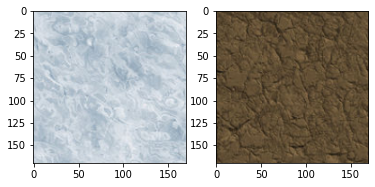

In [68]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(neige)
axarr[1].imshow(ground)

In [69]:
shape = (neige.shape[0],neige.shape[1])
a = np.linspace(1,0,shape[0])
b = np.linspace(0,1,shape[0])

In [70]:
m1 = np.concatenate((a,b))
m2 = np.concatenate((a,b))

In [71]:
vm1 = np.repeat(np.expand_dims(a,axis=1),shape[1],axis=1)
vm2 = np.repeat(np.expand_dims(b,axis=1),shape[1],axis=1)

In [72]:
im = np.zeros(neige.shape)
for i in range(neige.shape[2]):
    im[:,:,i] = np.multiply(vm1,neige[:,:,i]) + np.multiply(vm2,ground[:,:,i])

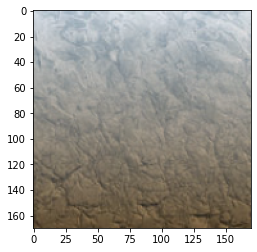

In [73]:
plt.imshow(im)

In [66]:
vm1+vm2

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [60]:
t = np.meshgrid(np.arange(img.shape[0]),np.arange(img.shape[1]))
x = list(t[0].flatten())
y = list(t[1].flatten())

In [61]:
rd.shuffle(x)
rd.shuffle(y)

In [62]:
nx = np.reshape(np.array(x),(img.shape[0],img.shape[1]))
ny = np.reshape(np.array(y),(img.shape[0],img.shape[1]))

In [63]:
n_img = np.zeros(img.shape, dtype='uint8')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        n_img[nx[i,j],ny[i,j],:] = img[i,j,:]

2D Gaussian array :



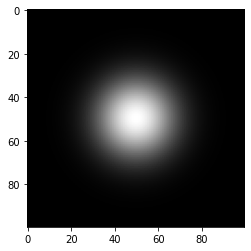

In [128]:
# Initializing value of x-axis and y-axis
# in the range -1 to 1
x, y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
dst = np.sqrt(x*x+y*y)
 
# Initializing sigma and muu
sigma = 0.25
muu = 0
 
# Calculating Gaussian array
gauss = 0.1*np.exp(-( (dst-muu)**2 / ( 2.0 * sigma**2 ) ) )
 
print("2D Gaussian array :\n")
plt.imshow(gauss,cmap='gray')

In [113]:
x, y = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
shape = (100,100)

f = open('data/gaussian_3dpoints.txt', 'w')
for i in range(shape[0]):
    for j in range(shape[1]):
        f.write(str(x[i,j])+" "+str(y[i,j])+" "+str(gauss[i,j])+"\n")
f.close()

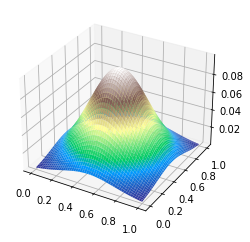

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x,y,gauss,cmap='terrain')
plt.show()

In [96]:
grad=np.gradient(gauss)

In [97]:
np.max(grad[0])

0.002448531885150658

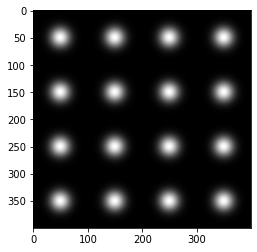

In [129]:
world = np.ones((400,400))*np.min(gauss)
for i in range(4):
    for j in range(4):
        world[i*100:(i+1)*100,j*100:(j+1)*100] = gauss

plt.imshow(world,cmap='gray')

In [130]:
x, y = np.meshgrid(np.linspace(0,1,400), np.linspace(0,1,400))
shape = (400,400)

f = open('data/gaussian_3dpoints.txt', 'w')
for i in range(shape[0]):
    for j in range(shape[1]):
        f.write(str(x[i,j])+" "+str(y[i,j])+" "+str(world[i,j])+"\n")
f.close()